In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, r2_score, roc_auc_score, roc_curve,classification_report



import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from sklearn import neighbors
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingClassifier

from warnings import filterwarnings
filterwarnings("ignore")

from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("/content/diabetes.csv")
df.head()
X=df.drop(columns=["Outcome"])
y = df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

**Model & Prediction**

In [27]:
from lightgbm import LGBMClassifier

In [28]:
lgbm_model=LGBMClassifier().fit(X_train,y_train)
?lgbm_model

In [31]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7207792207792207

**Model Tuning**

In [33]:
lgbm = LGBMClassifier()
lgbm_params= {"learning_rate":[0.001,0.01,0.1],
              "n_estimators":[200,500,100],
              "max_depth":[1,2,35,8]}

In [34]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [36]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}

In [37]:
lgbm_tuned = LGBMClassifier(learning_Rate=0.01,
                            max_depth=2,
                            n_estimators=500).fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)                            

In [38]:
accuracy_score(y_pred,y_test)

0.7597402597402597

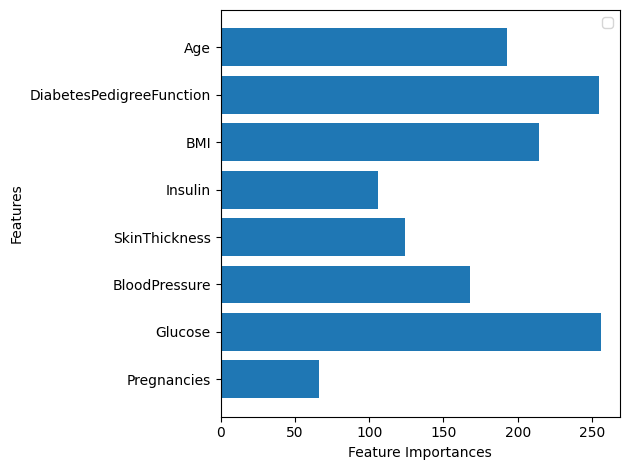

In [40]:
plt.barh(X_train.columns,lgbm_tuned.feature_importances_)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.legend()
plt.tight_layout()
plt.show()